In [1]:
from skimage import io,filters, morphology, measure, draw,exposure
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import os
import trackpy as tp
import pandas as pd
from scipy.stats import median_abs_deviation
from scipy.optimize import curve_fit
from sklearn.neighbors import KernelDensity
from scipy.stats import ttest_ind,ttest_rel
from skimage.filters import threshold_otsu
import seaborn as sns
from scipy import interpolate

from scipy import ndimage
import warnings
warnings.filterwarnings('ignore')

In [2]:
PATH = '<PATH/TO/DIR>/WAVE/FigS3D_Nanopatterns/'

In [3]:
# Load linescane csv files from Fiji
path = PATH + 'csv_data/gfp/'
csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]
dataframes = []
for csv_file in csv_files:
    df = pd.read_csv(path+"/"+csv_file)
    dataframes.append(df)
gfp = dataframes

In [4]:
path = PATH + 'csv_data/mem/'
csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]
# Load each CSV file into a DataFrame and append it to a list of DataFrames using a for loop
dataframes = []
for csv_file in csv_files:
    df = pd.read_csv(path+"/"+csv_file)
    dataframes.append(df)

# Concatenate all the DataFrames in the list into a single DataFrame using the pd.concat() function
mem= dataframes

In [5]:
# Normalize Sra1-eGFP channel data
gfp_norm = pd.DataFrame()
sigma = 2
gfp_norm['Distance'] = gfp[0]['Distance_(microns)']
for i in range(len(gfp)):
    gfp_norm[str(i)] = ndimage.gaussian_filter1d(gfp[i]['Gray_Value'], sigma)
    gfp_norm[str(i)] = (gfp_norm[str(i)]-gfp_norm[str(i)].min())/(gfp_norm[str(i)].max()-gfp_norm[str(i)].min())

In [6]:
std = []
mean = []
for i in range(len(gfp_norm)):
    std.append(gfp_norm.iloc[i,1:].std())
    mean.append(gfp_norm.iloc[i,1:].mean())
gfp_norm['std'] = std
gfp_norm['mean'] = mean

In [7]:
# Normalize membrane dye channel data
mem_norm = pd.DataFrame()
sigma = 2
mem_norm['Distance'] = mem[0]['Distance_(microns)']
for i in range(len(mem)):
    mem_norm[str(i)] = ndimage.gaussian_filter1d(mem[i]['Gray_Value'], sigma)
    mem_norm[str(i)] = (mem_norm[str(i)]-mem_norm[str(i)].min())/(mem_norm[str(i)].max()-mem_norm[str(i)].min())

In [8]:
std = []
mean = []
for i in range(len(mem_norm)):
    std.append(mem_norm.iloc[i,1:].std())
    mean.append(mem_norm.iloc[i,1:].mean())
mem_norm['std'] = std
mem_norm['mean'] = mean

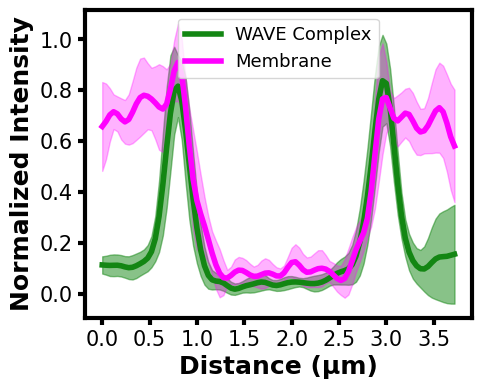

In [10]:
#Generate linescane plots
_,ax = plt.subplots(figsize=(5,4))
plt.plot(gfp_norm['Distance'],gfp_norm['mean'],color = '#138613',lw = 4,label = 'WAVE Complex')
plt.plot(mem_norm['Distance'],mem_norm['mean'],color = 'magenta',lw = 4,label = 'Membrane')
plt.xlabel('Distance (µm)',size = 18,fontweight = 'bold')
plt.legend(loc = 'upper center',fontsize = 13)
plt.ylabel('Normalized Intensity',size = 18,fontweight = 'bold')
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(3)

# increase tick width
ax.tick_params(width=3,size = 5)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.fill_between(gfp_norm['Distance'],gfp_norm['mean']-gfp_norm['std'],gfp_norm['mean']+gfp_norm['std'],alpha = 0.5,color = '#138613')
plt.fill_between(mem_norm['Distance'],mem_norm['mean']-mem_norm['std'],mem_norm['mean']+mem_norm['std'],alpha = 0.3,color = 'magenta')
plt.savefig(PATH + 'FigS3D_nanoridges_linscane.png',bbox_inches = 'tight',dpi = 300)